# 17. BERT (Bidirectional Encoder Representations from Transformers)

### 01) NLP에서의 사전 훈련

1. 사전 훈련된 워드 임베딩

  임베딩 사용하는 방법

  - 임베딩 층을 랜덤 초기화하여 처음부터 학습

  - 임베딩 알고리즘으로 사전 학습된 임베딩 벡터를 가져와 사용하는 방법

  단점 : 하나의 단어가 하나의 벡터 값으로 맵핑되므로, 문백을 고려하지 못하거나 동음이의어를 구분하지 못한다.

2. 사전 훈련된 언어 모델

 주어진 텍스트에서 이전 단어들로부터 다음 단어를 예측하도록 학습하므로 별도의 레이블이 부착되지 않는 텍스트로 학습 가능

 ELMo : 순방향 언어 모델과 역방향 언어 모델을 따로 학습한 후 이 언어 모델로 부터 임베딩 값을 얻음 -> 문맥에 따라 임베딩 값 달라짐

 트랜스포머 : 인코더-디코더 구조 (디코더는 LSTM 언어 모델처럼 순차적으로 이전 단어로부터 다음 단어 예측)

 GPT-1 : 트랜스포머 디코더로 총 12개의 층을 쌓은 후 방대한 텍스트 데이터 학습

 언어 모델을 양방향으로 구현하지 않는 이유 : 이미 예측해야 하는 단어를 역방향 언어 모델을 통해 미리 관측한 셈

3. 마스크드 언어 모델 Masked Language Model

  입력 텍스트 단어 집합의 15% 단어를 랜덤으로 Masking (원래 단어가 무엇이었는지 모르게 한다.) -> 양방향 구조 도입 가능

### 02) 버트 Bidirectional Encoder Representations from Transformers, BERT

1. 개요

  트랜스포머를 이용하여 구현, 레이블 없는 데이터로 사전 훈련된 모델

  BERT가 높은 성능을 얻을 수 있었던 이유 : 레이블 없는 방대한 데이터로 사전 훈련된 모델을 가지고, 레이블이 있는 다른 작업에서 추가 훈련을 하고 하이퍼파라미터를 재조정하여 이 모델을 사용하면 성능이 높게 나오는 기존의 사례 참고

  파인 튜닝 Fine-tuning : 다른 작업에 대해서 파라미터 재조정을 위한 추가 훈련 과정

2. BERT의 크기

  기본 구조 : 트랜스포머의 인코더를 쌓아올린 구조

  BERT-Base : L=12, D=768, A=12 : 110M개의 파라미터

  BERT-Large : L=24, D=1024, A=16 : 340M개의 파라미터

3. BERT의 문맥을 반영한 임베딩

  BERT 입력 : 모든 단어들은 D 차원의 임베딩 벡터가 되어 입력값으로 사용된다. -> 출력도 동일한 차원, 동일한 단어 개수

  입력은 BERT를 지난 후 문장의 문백을 모두 참고한 **문맥을 반영한 임베딩**이 된다. 이는 12층에 걸쳐 반복 진행된다. (멀티 헤드 셀프 어텐션 + 포지션 와이즈 피드 포워드 신경망)

4. BERT의 서브워드 토크나이저 : WordPiece

  서브워드 토크나이저 : 자주 등장하는 단어는 그대로 단어 집합에 추가, 자주 등장하지 않는 단어는 더 작은 단위인 서브워드로 분리되어 단어 집합에 추가 (이를 이용해 토큰화 수행)

  BERT 토큰화 수행 방식 : 이미 훈련 데이터로부터 만들어진 단어 집합 존재 -> 토큰이 단어 집합에 존재하면 토큰을 분리하지 않고, 존재하지 않으면 토큰을 서브워드로 분리하고 해당 토큰의 첫 서브워드를 제외한 나머지 서브워드는 앞에 '##'을 붙인 것을 토큰으로 한다. 

In [2]:
pip install transformers

     |████████████████████████████████| 3.8 MB 4.2 MB/s 
     |████████████████████████████████| 6.5 MB 30.5 MB/s 
     |████████████████████████████████| 895 kB 44.9 MB/s 
     |████████████████████████████████| 67 kB 4.0 MB/s 
     |████████████████████████████████| 596 kB 39.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
import pandas as pd
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased") # Bert-base의 토크나이저

result = tokenizer.tokenize('Here is the sentence I want embeddings for.')
print(result)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

['here', 'is', 'the', 'sentence', 'i', 'want', 'em', '##bed', '##ding', '##s', 'for', '.']


5. 포지션 임베딩 Position Embedding

  트랜스포머의 포지셔널 인코딩 : 사인 함수와 코사인 함수를 사용하여 위치에 따라 다른 값을 가지는 행렬을 만들어 이를 단어 벡터와 더하는 방법

  포지션 임베딩 : 위치 정보를 사인 함수와 코사인 함수가 아닌 학습을 통해 얻는 방법

  - 첫번째 단어의 임베딩 벡터 + 0번 포지션 임베딩 벡터

  - 두번째 단어의 임베딩 벡터 + 1번 포지션 임베딩 벡터

  - 세번째 단어의 임베딩 벡터 + 2번 포지션 임베딩 벡터

  - 네번째 단어의 임베딩 벡터 + 3번 포지션 임베딩 벡터

6. BERT의 사전 훈련 Pre-training

  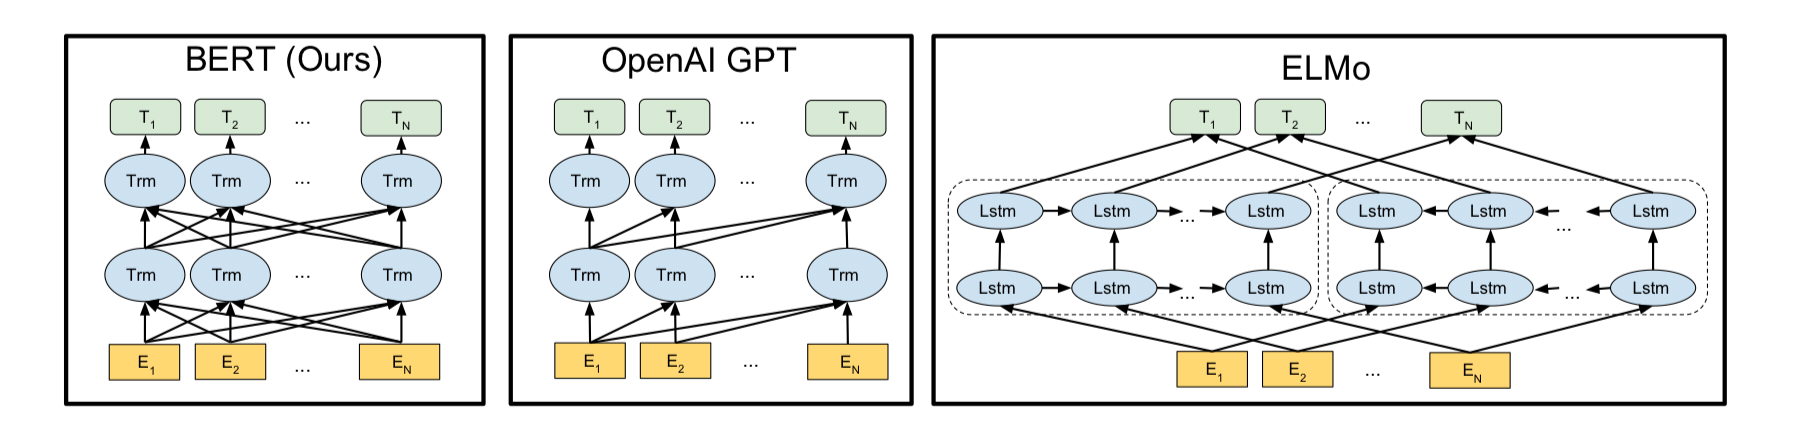

  BERT는 마스크드 언어 모델을 통해 양방향성을 얻었다.

  BERT의 사전 훈련 방법: 마스크드 언어 모델, 다음 문장 예측 NSP

  - 마스크드 언어 모델 Masked Language Model, MLM

    사전 훈련을 위해 인공신경망의 입력으로 들어가는 입력 텍스트의 15% 단어를 랜덤으로 마스킹 Masking

    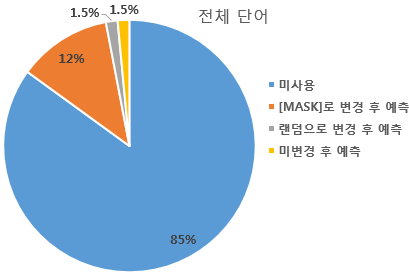

  - 다음 문장 예측 Next Sentence Prediction, NSP

    두 개의 문장을 준 후 이 문장이 이어지는 문장인지를 맞추는 방식으로 훈련 -> 두 문장의 관계 이해

7. 세그먼트 임베딩 Segment Embedding

  두 문장을 구분하기 위해 사용하는 임베딩 층

  BERT 임베딩 층 : 

  - WordPiece Embedding : 실질적인 입력이 되는 워드 임베딩. 임베딩 벡터의 종류는 단어 집합의 크기로 30,522개.

  - Position Embedding : 위치 정보를 학습하기 위한 임베딩. 임베딩 벡터의 종류는 문장의 최대 길이인 512개.

  - Segment Embedding : 두 개의 문장을 구분하기 위한 임베딩. 임베딩 벡터의 종류는 문장의 최대 개수인 2개.

  (두개의 문장을 입력 받을 필요가 없는 경우(ex. 영화 리뷰 분류) BERT 전체입력에 Sentence 0 임베딩만 더해 준다.)

8. BERT를 파인 튜닝하기

  사전 학습된 BERT에 우리가 풀고자 하는 태스크의 데이터를 추가 학습시켜 테스트

  - 하나의 텍스트에 대한 텍스트 분류 유형

    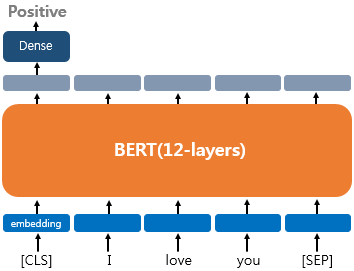

  - 하나의 텍스트에 대한 태깅 작업

    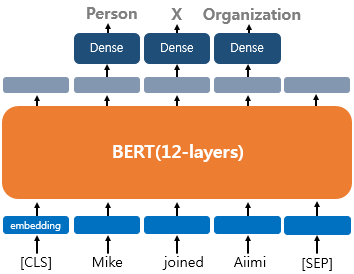

  - 텍스트 쌍에 대한 분류 또는 회귀 문제 (ex. 자연어 추론)

    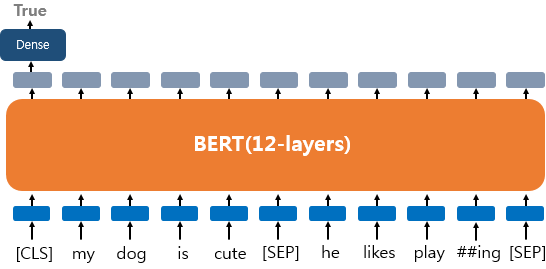

  - 질의 응답

    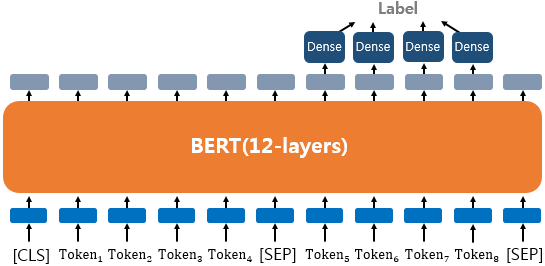

10. 어텐션 마스크 Attention Mask

  BERT 실제 실습에서는 어텐션 마스크라는 시퀀스 입력이 추가로 필요. 어텐션 마스크는 어텐션 연산을 할 때 불필요하게 패딩 토큰에 대해 어텐션을 하지 않도록 실제 단어와 패딩토큰을 구분할 수 있도록 알려주는 입력. 실제 단어 위치에는 1, 패딩 토큰 위치에는 0.



### 03) 구글 BERT 마스크드 언어 모델 실습

1. 마스크드 언어 모델과 토크나이저

  사전 훈련된 모델을 사용하므로 사용하는 모델과 토크나이저는 항상 맵핑관계여야 한다.

In [3]:
from transformers import TFBertForMaskedLM
from transformers import AutoTokenizer

model = TFBertForMaskedLM.from_pretrained('bert-large-uncased') # BERT를 마스크드 언어 모델 형태로 로드
tokenizer = AutoTokenizer.from_pretrained("bert-large-uncased") # 해당 모델 학습 당시 토크나이저 로드

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.37G [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForMaskedLM.

All the layers of TFBertForMaskedLM were initialized from the model checkpoint at bert-large-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForMaskedLM for predictions without further training.


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

2. BERT 입력

  [MASK] 예측

In [4]:
inputs = tokenizer('Soccer is a really fun [MASK].', return_tensors='tf')

print(inputs['input_ids']) # 정수 인코딩 결과
print(inputs['token_type_ids']) # 문장 구분하는 세그먼트 인코딩 결과
print(inputs['attention_mask']) # 실제 단어와 패딩 토큰 구분하는 어텐션 마스크 확인

tf.Tensor([[ 101 4715 2003 1037 2428 4569  103 1012  102]], shape=(1, 9), dtype=int32)
tf.Tensor([[0 0 0 0 0 0 0 0 0]], shape=(1, 9), dtype=int32)
tf.Tensor([[1 1 1 1 1 1 1 1 1]], shape=(1, 9), dtype=int32)


3. [MASK] 토큰 예측

In [5]:
from transformers import FillMaskPipeline
pip = FillMaskPipeline(model=model, tokenizer=tokenizer)

pip('Soccer is a really fun [MASK].') # 입력 문장에서 [MASK] 상위 5개 예측

[{'score': 0.7621121406555176,
  'sequence': 'soccer is a really fun sport.',
  'token': 4368,
  'token_str': 'sport'},
 {'score': 0.20341981947422028,
  'sequence': 'soccer is a really fun game.',
  'token': 2208,
  'token_str': 'game'},
 {'score': 0.012208553962409496,
  'sequence': 'soccer is a really fun thing.',
  'token': 2518,
  'token_str': 'thing'},
 {'score': 0.0018630268750712276,
  'sequence': 'soccer is a really fun activity.',
  'token': 4023,
  'token_str': 'activity'},
 {'score': 0.0013354829279705882,
  'sequence': 'soccer is a really fun field.',
  'token': 2492,
  'token_str': 'field'}]

### 4) 한국어 BERT 마스크드 언어 모델 실습

from_pt = True : 해당 모델이 기존에는 파이토치로 학습된 모델이었지만 텐서플로우를 사용하겠다. 

In [6]:
model = TFBertForMaskedLM.from_pretrained('klue/bert-base', from_pt=True)
tokenizer = AutoTokenizer.from_pretrained("klue/bert-base")

Downloading:   0%|          | 0.00/425 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/424M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForMaskedLM: ['cls.predictions.decoder.bias', 'bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForMaskedLM from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForMaskedLM from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertForMaskedLM were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForMaskedLM for predictions without further training.


Downloading:   0%|          | 0.00/289 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/243k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/125 [00:00<?, ?B/s]

### 5) 구글 BERT의 다음 문장 예측

1. 다음 문장 예측 모델과 토크나이저



In [7]:
import tensorflow as tf
from transformers import TFBertForNextSentencePrediction
from transformers import AutoTokenizer

model = TFBertForNextSentencePrediction.from_pretrained('bert-base-uncased')
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForNextSentencePrediction.

All the layers of TFBertForNextSentencePrediction were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForNextSentencePrediction for predictions without further training.


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

2. BERT 입력

In [8]:
prompt = "In Italy, pizza served in formal settings, such as at a restaurant, is presented unsliced."
next_sentence = "pizza is eaten with the use of a knife and fork. In casual settings, however, it is cut into wedges to be eaten while held in the hand."

encoding = tokenizer(prompt, next_sentence, return_tensors='tf') # 두 문장 정수 인코딩

print(encoding['input_ids'])
print(tokenizer.decode(encoding['input_ids'][0])) # 다시 디코딩
print(encoding['token_type_ids']) # 문장 구분하는 세그먼트 인코딩 결과

tf.Tensor(
[[  101  1999  3304  1010 10733  2366  1999  5337 10906  1010  2107  2004
   2012  1037  4825  1010  2003  3591  4895 14540  6610  2094  1012   102
  10733  2003  8828  2007  1996  2224  1997  1037  5442  1998  9292  1012
   1999 10017 10906  1010  2174  1010  2009  2003  3013  2046 17632  2015
   2000  2022  8828  2096  2218  1999  1996  2192  1012   102]], shape=(1, 58), dtype=int32)
[CLS] in italy, pizza served in formal settings, such as at a restaurant, is presented unsliced. [SEP] pizza is eaten with the use of a knife and fork. in casual settings, however, it is cut into wedges to be eaten while held in the hand. [SEP]
tf.Tensor(
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]], shape=(1, 58), dtype=int32)


3. 다음 문장 예측

  0번 인덱스 확률값이 1번보다 훨씬 크다. 이는 실질적으로 모델이 예측한 레이블이 0이란 뜻이다.

  최종 예측 레이블은 0인데, 이는 이어지는 레이블은 0, 이어지지 않는 레이블은 1로 매핑되기 때문이다. 

In [10]:
logits = model(encoding['input_ids'], token_type_ids=encoding['token_type_ids'])[0]
softmax = tf.keras.layers.Softmax()
probs = softmax(logits)
print(probs)
print('최종 예측 레이블 :', tf.math.argmax(probs, axis=-1).numpy())

tf.Tensor([[9.9999714e-01 2.8381855e-06]], shape=(1, 2), dtype=float32)
최종 예측 레이블 : [0]


### 07) 센텐스버트 Sentence BERT, SBERT

1. BERT의 문장 임베딩

  BERT로부터 문장 벡터를 얻는 법 : 

  - [CLS] 토큰의 출력 벡터를 문장 벡터로 간주

  - BERT의 모든 풀력 벡터들을 평균내는 것(평균 풀링) -> 모든 단어의 의미 반영

  - BERT 각 단어의 출력 벡터들에 대해 맥스 풀링을 진행한 벡터를 얻는 것 -> 중요한 단어의 의미 반영

2. SBERT 

  BERT 문장 임베딩의 성능을 우수하게 개선시킨 모델

  SBERT 학습하는 방법 (하나만 쓸 수도, 둘 다 쓸 수도 있음): 

  -  문장 쌍 분류 테스크(NLI: 수반, 모순, 중립 관계 판단)로 파인 튜닝

  - 문장 쌍 회귀 태스크로 파인 튜닝 (STS : 두개의 문장으로부터 의미적 유사성 구함)
